EDA: examination of mic breakdown

Discoveries:
- there is at least 1 entry which is bad data
  - entry uses ME mic channel
- all but 72 entries have an ME and SE entry
- the 72 exceptions only have an SE entry
- there are 34 positions which have a counterpart in two locations
  - can be confusing if position is indexed without considering location

Action:
- filter out non-SE entries

In [2]:
path = '2019-10-22-15-30_Fraunhofer-IDMT_30Kmh_650690_A_D_CR_SE_CH12.wav'
directory_path = "./IDMT_Traffic/audio/"

In [2]:
import utils.preprocessing_utils as preproc
import utils.signal_processing_utils as sp

In [5]:
import os
paths = os.listdir(directory_path)
paths = [path for path in paths if '-BG' not in path]
paths = [path for path in paths if 'ME' not in path]
# non_noise.index(path)
len(paths)

4717

In [20]:
[path for path in paths if '650690' in path]

['2019-10-22-15-30_Fraunhofer-IDMT_30Kmh_650690_A_D_CR_ME_CH12.wav',
 '2019-10-22-15-30_Fraunhofer-IDMT_30Kmh_650690_A_D_CR_SE_CH34.wav']

In [21]:
path_2 =  '2019-10-22-15-30_Fraunhofer-IDMT_30Kmh_650690_A_D_CR_SE_CH34.wav'

In [22]:
signal = preproc.extractAudio(directory_path+path_2)

In [4]:
import matplotlib.pyplot as plt

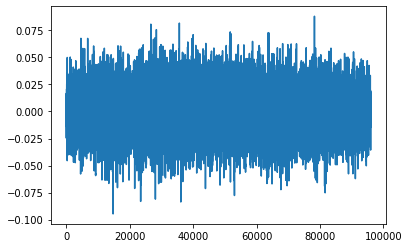

In [23]:
plt.plot(signal)

In [25]:
import numpy as np
import scipy as sp
from scipy.stats import kurtosis,skew,mode,gstd,describe,iqr,gmean,hmean,median_abs_deviation,variation,tstd,gstd,moment,entropy
from sklearn.preprocessing import normalize


In [26]:


def extractStatisticalFeatures(signal):

    # Global feature extraction
    
    ft=sp.fft.fft(signal) # code for computing the spectrum using Fast Fourier Transform
    magnitude=np.absolute(ft)
    spec=magnitude
    
    k=kurtosis(spec)
    s=skew(spec)
    mean=np.mean(spec)
    z=np.array(mode(spec)[0])
    mode_var=float(z)
    i=iqr(spec)
    g=gmean(spec)
    h=hmean(spec)
    dev=median_abs_deviation(spec)
    var=variation(spec)
    variance=np.var(spec)
    std=tstd(spec)

    # gstd_var=gstd(spec)
    gstd_var=0
    ent= entropy(spec)
    
    features=[mode_var,k,s,mean,i,g,h,dev,var,variance,std,gstd_var,ent]

    features=normalize([features])
    features=np.array(features)
    features=np.reshape(features,(13,))
    #feat=features # save the matrix and vector in a list
    
    return features

features = extractStatisticalFeatures(signal)
# features

In [18]:
a = np.isnan(signal)
np.sum(a)

0

In [75]:
# features = sp.extractStatisticalFeatures(signal)

In [77]:
# condition = lambda path: 'SE' in path

count_SE = len(list(filter(lambda path: 'SE' in path, paths)))
count_ME = len(list(filter(lambda path: 'ME' in path, paths)))

abs(count_SE-count_ME)

72

In [65]:
def extractFeatures(path):
    features = path[:-4].split('_')
    features[2] = features[2][:-3]
    features[-1] = features[-1][2:]
    features = features[:6] + [features[6][0],features[6][1]] + features[7:]
    return features

def extractPosMic(path):
    features = extractFeatures(path)
    return [features[0],features[-2]]

In [28]:
extractFeatures(paths[0])

['1116695', 'ME']

In [30]:
features = [extractPosMic(path) for path in paths]

In [32]:
a = {}

for id,mic in features:
    if not id in a:
        a[id] = []
    a[id].append(mic)

In [43]:
len(a)

4683

In [33]:
b = {id: len(mics) for id,mics in a.items()}


In [44]:
len(b)

4683

In [56]:
e = [id for id,num_mics in b.items() if num_mics < 2]
len(e)

72

In [64]:
f = [id for id,num_mics in b.items() if num_mics == 4]
len(f)

34

In [73]:
new_paths = []
for path in paths:
    features = extractFeatures(path)
    # if features[3] in f:
    if features[3] == f[2]:
        new_paths.append(path)

# len(new_paths)/4
new_paths

['2019-10-22-16-35_Fraunhofer-IDMT_30Kmh_1214232_A_D_CL_ME_CH12.wav',
 '2019-10-22-16-35_Fraunhofer-IDMT_30Kmh_1214232_A_D_CL_SE_CH34.wav',
 '2019-11-18-15-45_Langewiesener-Strasse_50Kmh_1214232_A_D_CL_ME_CH12.wav',
 '2019-11-18-15-45_Langewiesener-Strasse_50Kmh_1214232_A_D_CL_SE_CH34.wav']

In [71]:
new_paths

['2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1626008_M_D_CR_ME_CH12.wav',
 '2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1626008_M_D_CR_SE_CH34.wav',
 '2019-11-18-16-40_Langewiesener-Strasse_50Kmh_1626008_A_D_TL_ME_CH12.wav',
 '2019-11-18-16-40_Langewiesener-Strasse_50Kmh_1626008_A_D_TL_SE_CH34.wav']

In [59]:
paths[0]

'2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1116695_M_D_CR_ME_CH12.wav'

In [58]:
{id:mics for id,mics in a.items() if id in e}

{'129666': ['SE'],
 '134600': ['SE'],
 '139160': ['SE'],
 '1793573': ['SE'],
 '1895856': ['SE'],
 '1903800': ['SE'],
 '1909056': ['SE'],
 '1911944': ['SE'],
 '1917112': ['SE'],
 '1941152': ['SE'],
 '1942344': ['SE'],
 '1946544': ['SE'],
 '1947400': ['SE'],
 '2115047': ['SE'],
 '2553480': ['SE'],
 '2555504': ['SE'],
 '265000': ['SE'],
 '269688': ['SE'],
 '2788272': ['SE'],
 '3105336': ['SE'],
 '3326888': ['SE'],
 '3330360': ['SE'],
 '3332176': ['SE'],
 '3335336': ['SE'],
 '3336504': ['SE'],
 '3337928': ['SE'],
 '3339256': ['SE'],
 '3444960': ['SE'],
 '4145960': ['SE'],
 '4255536': ['SE'],
 '4256816': ['SE'],
 '4513033': ['SE'],
 '4532636': ['SE'],
 '4710550': ['SE'],
 '4711927': ['SE'],
 '4715388': ['SE'],
 '4716626': ['SE'],
 '4718465': ['SE'],
 '4719584': ['SE'],
 '4724861': ['SE'],
 '4726152': ['SE'],
 '4733359': ['SE'],
 '4738560': ['SE'],
 '4953673': ['SE'],
 '501875': ['SE'],
 '598780': ['SE'],
 '6002996': ['SE'],
 '6003944': ['SE'],
 '6005750': ['SE'],
 '6044669': ['SE'],
 '60453

In [47]:
c = list(b.values())
len(c)

4683

In [52]:
d = {i:len(list(filter(lambda num_mics:num_mics==i,c))) for i in range(8)}
d
# for id,num_mics in b.items():
#     c[num_mics]

{0: 0, 1: 72, 2: 4577, 3: 0, 4: 34, 5: 0, 6: 0, 7: 0}